# Introduction
Thank you for applying to Double River! This is a coding assessment you can use to showcase your programming skills.

This coding assessment has 2 parts. It is very open-ended, and there is not a single correct response. There are many possible approaches; choose one or two rather than attacking the problem every possible way. We do not expect you to take more than 3-4 hours at maximum. You will be assessed on your creativity and the clarity with which you explain the steps you take. This is an opportunity for you to showcase your knowledge of machine learning algorithms. Please document your data exploration and modeling process. We expect you to use Python. Feel free to use any open source packages you desire, but don't rely too much on canned solutions. For example, using solely Facebook's Prophet to forecast does not give us a good idea of your level of expertise.

Your submission should consist of a single zipped directory named lastname_firstname.zip (with your own last name and first name substituted) containing

coding_exercise.ipynb, containing your code and relevant figures. Feel free to just modify this file you are reading
crime_pred.csv, containing your predictions for Part 1
market1_pred.csv, containing half your predictions for Part 2
market2_pred.csv, containing the other half of your predictions for Part 2
Any other relevant scripts you wrote to solve the problem
The required format for 2-4 will be explained below.

To submit, email your zipped folder to robertwagner@doubleriver.com and taylorsorensen@doubleriver.com. If you need an extension, please let us know. If you have any questions, please reach out to us. Good luck!



# Part 1

crime_2020.csv and crime_2021.csv contain real data on crime in Boston. Predict the number of vandalism incidents and the number of verbal disputes (OFFENSE_DESCRIPTION=="VANDALISM" or OFFENSE_DESCRIPTION=="VERBAL DISPUTE") for each day from July 9, 2021 to December 31, 2021. Save your predictions to a csv named crime_pred.csv, with the following format:

| Date | VANDALISM | VERBAL DISPUTE |
| --- | --- | --- |
| 2021-07-09 | prediction | prediction |
| --- | --- | --- |

Obviously, we can't assess your actual prediction accuracy. We will focus on your modeling decisions.

In [376]:
import pandas as pd

crime_2020 = pd.read_csv('crime_2020.csv')
crime_2020

C:\Users\prasa\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,854652314,3115,NaN,INVESTIGATE PERSON,B2,289,0,2020-02-20 00:00:00,2020,2,Thursday,0,NaN,SCHROEDER PLZ,42.333679,-71.091878,"(42.3336792181085, -71.0918775461846)"
1,457856954,3115,NaN,INVESTIGATE PERSON,B2,289,0,2020-02-21 01:42:00,2020,2,Friday,1,NaN,SCHROEDER PLZ,42.333679,-71.091878,"(42.3336792181085, -71.0918775461846)"
2,302030654,1106,NaN,FRAUD - CREDIT CARD / ATM FRAUD,D4,167,0,2020-04-24 13:00:00,2020,4,Friday,13,NaN,MASSACHUSETTS AVE,42.339542,-71.069409,"(42.3395419898301, -71.0694087696754)"
3,212025777,1108,NaN,FRAUD - WELFARE,A7,28,0,2020-05-01 00:00:00,2020,5,Friday,0,NaN,TRENTON ST,42.370818,-71.039291,"(42.3708180467024, -71.0392907813515)"
4,212025557,2670,NaN,HARASSMENT/ CRIMINAL HARASSMENT,A1,77,0,2020-09-07 00:00:00,2020,9,Monday,0,NaN,PRINCE ST,42.361839,-71.059765,"(42.3618385665647, -71.0597648909416)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70889,20063425,3114,NaN,INVESTIGATE PROPERTY,A7,21,0,2020-09-01 00:00:00,2020,9,Tuesday,0,NaN,PARIS ST,42.374427,-71.035279,"(42.3744269722053, -71.0352787630199)"
70890,20062356,1107,NaN,FRAUD - IMPERSONATION,E18,520,0,2020-08-28 18:39:00,2020,8,Friday,18,NaN,RIVERSIDE SQ,42.256216,-71.124019,"(42.2562159204022, -71.1240194732902)"
70891,20046400,1501,NaN,WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...,B2,330,0,2020-07-02 01:38:00,2020,7,Thursday,1,NaN,PASADENA RD,42.305761,-71.083772,"(42.3057609263196, -71.0837715727385)"
70892,20038446,1501,NaN,WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...,B2,300,0,2020-06-03 01:15:00,2020,6,Wednesday,1,NaN,WASHINGTON ST,42.323808,-71.089150,"(42.3238077563779, -71.0891502345332)"


In [377]:
#Reading Crime_2021.csv
crime_2021=pd.read_csv("crime_2021.csv")
crime_2021

C:\Users\prasa\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,PLTEST003,3114,NaN,INVESTIGATE PROPERTY,B2,289,0,2021-05-12 00:00:00,2021,5,Wednesday,0,NaN,SCHROEDER PLZ,42.333679,-71.091878,"(42.3336792181085, -71.0918775461846)"
1,PLTEST002,3114,NaN,INVESTIGATE PROPERTY,B2,289,0,2021-05-12 00:00:00,2021,5,Wednesday,0,NaN,SCHROEDER PLZ,42.333679,-71.091878,"(42.3336792181085, -71.0918775461846)"
2,PLTEST001,3114,NaN,INVESTIGATE PROPERTY,B2,,0,2021-03-29 00:00:00,2021,3,Monday,0,NaN,SCHROEDER PLAZA,0.000000,0.000000,"(0, 0)"
3,312030979,3201,NaN,PROPERTY - LOST/ MISSING,E13,465,0,2021-03-22 00:00:00,2021,3,Monday,0,NaN,BLUE HILL AVE,42.284826,-71.091374,"(42.2848257658049, -71.091373689388)"
4,212996778,3301,NaN,VERBAL DISPUTE,C6,204,0,2021-02-01 06:20:00,2021,2,Monday,6,NaN,GILLETTE PARK,42.344125,-71.056853,"(42.3441248392933, -71.0568533916328)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34910,121016052,3831,NaN,M/V - LEAVING SCENE - PROPERTY DAMAGE,C11,347,0,2021-03-13 09:10:00,2021,3,Saturday,9,NaN,DORCHESTER AVE,42.307289,-71.058499,"(42.3072894059195, -71.0584991240592)"
34911,121005808,1102,NaN,FRAUD - FALSE PRETENSE / SCHEME,B3,289,0,2021-01-19 12:00:00,2021,1,Tuesday,12,NaN,CLARKWOOD ST,42.333679,-71.091878,"(42.3336792181085, -71.0918775461846)"
34912,121000816,3304,NaN,NOISY PARTY/RADIO-NO ARREST,E5,675,0,2021-01-04 00:00:00,2021,1,Monday,0,NaN,BRADFIELD AVENUE,0.000000,0.000000,"(0, 0)"
34913,120221042,3006,NaN,SICK/INJURED/MEDICAL - PERSON,E5,680,0,2021-04-02 10:45:00,2021,4,Friday,10,NaN,WASHINGTON ST,42.283902,-71.130863,"(42.2839024364831, -71.130862626435)"


In [378]:
# Combining/ merging two datasets crime_2020 and crime_2021
crime_data=crime_2020.append(crime_2021)
crime_data

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,854652314,3115,NaN,INVESTIGATE PERSON,B2,289,0,2020-02-20 00:00:00,2020,2,Thursday,0,NaN,SCHROEDER PLZ,42.333679,-71.091878,"(42.3336792181085, -71.0918775461846)"
1,457856954,3115,NaN,INVESTIGATE PERSON,B2,289,0,2020-02-21 01:42:00,2020,2,Friday,1,NaN,SCHROEDER PLZ,42.333679,-71.091878,"(42.3336792181085, -71.0918775461846)"
2,302030654,1106,NaN,FRAUD - CREDIT CARD / ATM FRAUD,D4,167,0,2020-04-24 13:00:00,2020,4,Friday,13,NaN,MASSACHUSETTS AVE,42.339542,-71.069409,"(42.3395419898301, -71.0694087696754)"
3,212025777,1108,NaN,FRAUD - WELFARE,A7,28,0,2020-05-01 00:00:00,2020,5,Friday,0,NaN,TRENTON ST,42.370818,-71.039291,"(42.3708180467024, -71.0392907813515)"
4,212025557,2670,NaN,HARASSMENT/ CRIMINAL HARASSMENT,A1,77,0,2020-09-07 00:00:00,2020,9,Monday,0,NaN,PRINCE ST,42.361839,-71.059765,"(42.3618385665647, -71.0597648909416)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34910,121016052,3831,NaN,M/V - LEAVING SCENE - PROPERTY DAMAGE,C11,347,0,2021-03-13 09:10:00,2021,3,Saturday,9,NaN,DORCHESTER AVE,42.307289,-71.058499,"(42.3072894059195, -71.0584991240592)"
34911,121005808,1102,NaN,FRAUD - FALSE PRETENSE / SCHEME,B3,289,0,2021-01-19 12:00:00,2021,1,Tuesday,12,NaN,CLARKWOOD ST,42.333679,-71.091878,"(42.3336792181085, -71.0918775461846)"
34912,121000816,3304,NaN,NOISY PARTY/RADIO-NO ARREST,E5,675,0,2021-01-04 00:00:00,2021,1,Monday,0,NaN,BRADFIELD AVENUE,0.000000,0.000000,"(0, 0)"
34913,120221042,3006,NaN,SICK/INJURED/MEDICAL - PERSON,E5,680,0,2021-04-02 10:45:00,2021,4,Friday,10,NaN,WASHINGTON ST,42.283902,-71.130863,"(42.2839024364831, -71.130862626435)"


In [379]:
#info() method used to the summary of the dataframe.
#prints information about index type ,columns, null values,memory usage
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105809 entries, 0 to 34914
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      105809 non-null  object 
 1   OFFENSE_CODE         105809 non-null  int64  
 2   OFFENSE_CODE_GROUP   0 non-null       float64
 3   OFFENSE_DESCRIPTION  105809 non-null  object 
 4   DISTRICT             104645 non-null  object 
 5   REPORTING_AREA       105809 non-null  object 
 6   SHOOTING             105809 non-null  int64  
 7   OCCURRED_ON_DATE     105809 non-null  object 
 8   YEAR                 105809 non-null  int64  
 9   MONTH                105809 non-null  int64  
 10  DAY_OF_WEEK          105809 non-null  object 
 11  HOUR                 105809 non-null  int64  
 12  UCR_PART             0 non-null       float64
 13  STREET               105129 non-null  object 
 14  Lat                  105809 non-null  float64
 15  Long              

In [380]:
crime_data.shape  # to find the shape the dataframe

(105809, 17)

In [381]:
crime_data.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

In [382]:
# Checking if the data contains any Missing values
crime_data.isnull().sum()

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP     105809
OFFENSE_DESCRIPTION         0
DISTRICT                 1164
REPORTING_AREA              0
SHOOTING                    0
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART               105809
STREET                    680
Lat                         0
Long                        0
Location                    0
dtype: int64

# Offense_code_group , District , UCR Part and Street columns contains missing values

In [383]:
print(crime_data.OFFENSE_DESCRIPTION.unique().tolist())
print(len(crime_data.OFFENSE_DESCRIPTION.unique().tolist()))  # 123 different offense descriptions are there

['INVESTIGATE PERSON', 'FRAUD - CREDIT CARD / ATM FRAUD', 'FRAUD - WELFARE', 'HARASSMENT/ CRIMINAL HARASSMENT', 'M/V PLATES - LOST', 'LARCENY THEFT OF BICYCLE', 'INVESTIGATE PROPERTY', 'PROPERTY - LOST/ MISSING', 'FRAUD - IMPERSONATION', 'TOWED MOTOR VEHICLE', 'VAL - VIOLATION OF AUTO LAW', 'ASSAULT - SIMPLE', 'M/V ACCIDENT - PERSONAL INJURY', 'THREATS TO DO BODILY HARM', 'AUTO THEFT - LEASED/RENTED VEHICLE', 'LARCENY THEFT OF MV PARTS & ACCESSORIES', 'VANDALISM', 'FRAUD - FALSE PRETENSE / SCHEME', 'AUTO THEFT', 'LARCENY ALL OTHERS', 'MISSING PERSON', 'SERVICE TO OTHER AGENCY', 'LARCENY THEFT FROM BUILDING', 'FRAUD - WIRE', 'PROPERTY - ACCIDENTAL DAMAGE', 'FORGERY / COUNTERFEITING', 'RECOVERED - MV RECOVERED IN BOSTON (STOLEN IN BOSTON) MUST BE SUPPLEMENTAL', 'ASSAULT - AGGRAVATED', 'BURGLARY - COMMERICAL', 'M/V ACCIDENT - PROPERTY DAMAGE', 'BURGLARY - RESIDENTIAL', 'FIRE REPORT', 'SICK ASSIST', 'M/V - LEAVING SCENE - PROPERTY DAMAGE', 'GRAFFITI', 'VAL - OPERATING W/O AUTHORIZATION LAW

In [384]:
# Drop Offense code group and UCR part columns since they does not contain any data
crime_data=crime_data.drop(columns=["OFFENSE_CODE_GROUP","UCR_PART"])
crime_data

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location
0,854652314,3115,INVESTIGATE PERSON,B2,289,0,2020-02-20 00:00:00,2020,2,Thursday,0,SCHROEDER PLZ,42.333679,-71.091878,"(42.3336792181085, -71.0918775461846)"
1,457856954,3115,INVESTIGATE PERSON,B2,289,0,2020-02-21 01:42:00,2020,2,Friday,1,SCHROEDER PLZ,42.333679,-71.091878,"(42.3336792181085, -71.0918775461846)"
2,302030654,1106,FRAUD - CREDIT CARD / ATM FRAUD,D4,167,0,2020-04-24 13:00:00,2020,4,Friday,13,MASSACHUSETTS AVE,42.339542,-71.069409,"(42.3395419898301, -71.0694087696754)"
3,212025777,1108,FRAUD - WELFARE,A7,28,0,2020-05-01 00:00:00,2020,5,Friday,0,TRENTON ST,42.370818,-71.039291,"(42.3708180467024, -71.0392907813515)"
4,212025557,2670,HARASSMENT/ CRIMINAL HARASSMENT,A1,77,0,2020-09-07 00:00:00,2020,9,Monday,0,PRINCE ST,42.361839,-71.059765,"(42.3618385665647, -71.0597648909416)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34910,121016052,3831,M/V - LEAVING SCENE - PROPERTY DAMAGE,C11,347,0,2021-03-13 09:10:00,2021,3,Saturday,9,DORCHESTER AVE,42.307289,-71.058499,"(42.3072894059195, -71.0584991240592)"
34911,121005808,1102,FRAUD - FALSE PRETENSE / SCHEME,B3,289,0,2021-01-19 12:00:00,2021,1,Tuesday,12,CLARKWOOD ST,42.333679,-71.091878,"(42.3336792181085, -71.0918775461846)"
34912,121000816,3304,NOISY PARTY/RADIO-NO ARREST,E5,675,0,2021-01-04 00:00:00,2021,1,Monday,0,BRADFIELD AVENUE,0.000000,0.000000,"(0, 0)"
34913,120221042,3006,SICK/INJURED/MEDICAL - PERSON,E5,680,0,2021-04-02 10:45:00,2021,4,Friday,10,WASHINGTON ST,42.283902,-71.130863,"(42.2839024364831, -71.130862626435)"


In [385]:
# Convert string into time stamp 
from datetime import datetime

crime_data.OCCURRED_ON_DATE=pd.to_datetime(crime_data.OCCURRED_ON_DATE)
crime_data

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location
0,854652314,3115,INVESTIGATE PERSON,B2,289,0,2020-02-20 00:00:00,2020,2,Thursday,0,SCHROEDER PLZ,42.333679,-71.091878,"(42.3336792181085, -71.0918775461846)"
1,457856954,3115,INVESTIGATE PERSON,B2,289,0,2020-02-21 01:42:00,2020,2,Friday,1,SCHROEDER PLZ,42.333679,-71.091878,"(42.3336792181085, -71.0918775461846)"
2,302030654,1106,FRAUD - CREDIT CARD / ATM FRAUD,D4,167,0,2020-04-24 13:00:00,2020,4,Friday,13,MASSACHUSETTS AVE,42.339542,-71.069409,"(42.3395419898301, -71.0694087696754)"
3,212025777,1108,FRAUD - WELFARE,A7,28,0,2020-05-01 00:00:00,2020,5,Friday,0,TRENTON ST,42.370818,-71.039291,"(42.3708180467024, -71.0392907813515)"
4,212025557,2670,HARASSMENT/ CRIMINAL HARASSMENT,A1,77,0,2020-09-07 00:00:00,2020,9,Monday,0,PRINCE ST,42.361839,-71.059765,"(42.3618385665647, -71.0597648909416)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34910,121016052,3831,M/V - LEAVING SCENE - PROPERTY DAMAGE,C11,347,0,2021-03-13 09:10:00,2021,3,Saturday,9,DORCHESTER AVE,42.307289,-71.058499,"(42.3072894059195, -71.0584991240592)"
34911,121005808,1102,FRAUD - FALSE PRETENSE / SCHEME,B3,289,0,2021-01-19 12:00:00,2021,1,Tuesday,12,CLARKWOOD ST,42.333679,-71.091878,"(42.3336792181085, -71.0918775461846)"
34912,121000816,3304,NOISY PARTY/RADIO-NO ARREST,E5,675,0,2021-01-04 00:00:00,2021,1,Monday,0,BRADFIELD AVENUE,0.000000,0.000000,"(0, 0)"
34913,120221042,3006,SICK/INJURED/MEDICAL - PERSON,E5,680,0,2021-04-02 10:45:00,2021,4,Friday,10,WASHINGTON ST,42.283902,-71.130863,"(42.2839024364831, -71.130862626435)"


In [386]:
#Creating two new columns with Date and Time 
crime_data["DATE"]=[d.date() for d in crime_data["OCCURRED_ON_DATE"]]
crime_data["TIME"]=[d.time() for d in crime_data["OCCURRED_ON_DATE"]]

In [387]:

crime_data

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location,DATE,TIME
0,854652314,3115,INVESTIGATE PERSON,B2,289,0,2020-02-20 00:00:00,2020,2,Thursday,0,SCHROEDER PLZ,42.333679,-71.091878,"(42.3336792181085, -71.0918775461846)",2020-02-20,00:00:00
1,457856954,3115,INVESTIGATE PERSON,B2,289,0,2020-02-21 01:42:00,2020,2,Friday,1,SCHROEDER PLZ,42.333679,-71.091878,"(42.3336792181085, -71.0918775461846)",2020-02-21,01:42:00
2,302030654,1106,FRAUD - CREDIT CARD / ATM FRAUD,D4,167,0,2020-04-24 13:00:00,2020,4,Friday,13,MASSACHUSETTS AVE,42.339542,-71.069409,"(42.3395419898301, -71.0694087696754)",2020-04-24,13:00:00
3,212025777,1108,FRAUD - WELFARE,A7,28,0,2020-05-01 00:00:00,2020,5,Friday,0,TRENTON ST,42.370818,-71.039291,"(42.3708180467024, -71.0392907813515)",2020-05-01,00:00:00
4,212025557,2670,HARASSMENT/ CRIMINAL HARASSMENT,A1,77,0,2020-09-07 00:00:00,2020,9,Monday,0,PRINCE ST,42.361839,-71.059765,"(42.3618385665647, -71.0597648909416)",2020-09-07,00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34910,121016052,3831,M/V - LEAVING SCENE - PROPERTY DAMAGE,C11,347,0,2021-03-13 09:10:00,2021,3,Saturday,9,DORCHESTER AVE,42.307289,-71.058499,"(42.3072894059195, -71.0584991240592)",2021-03-13,09:10:00
34911,121005808,1102,FRAUD - FALSE PRETENSE / SCHEME,B3,289,0,2021-01-19 12:00:00,2021,1,Tuesday,12,CLARKWOOD ST,42.333679,-71.091878,"(42.3336792181085, -71.0918775461846)",2021-01-19,12:00:00
34912,121000816,3304,NOISY PARTY/RADIO-NO ARREST,E5,675,0,2021-01-04 00:00:00,2021,1,Monday,0,BRADFIELD AVENUE,0.000000,0.000000,"(0, 0)",2021-01-04,00:00:00
34913,120221042,3006,SICK/INJURED/MEDICAL - PERSON,E5,680,0,2021-04-02 10:45:00,2021,4,Friday,10,WASHINGTON ST,42.283902,-71.130863,"(42.2839024364831, -71.130862626435)",2021-04-02,10:45:00


In [388]:
#checking any duplicate values in the observations in dataframe
crime_data.duplicated().any()  # There are no duplicate rows present in the data

False

In [389]:
# number of crimes per each day
crime_by_date=pd.DataFrame(crime_data.groupby("DATE").size().rename("Number of incidents").reset_index())
crime_by_date

,DATE,Number of incidents
0,2020-01-01,213
1,2020-01-02,203
2,2020-01-03,223
3,2020-01-04,180
4,2020-01-05,162
...,...,...
550,2021-07-04,172
551,2021-07-05,207
552,2021-07-06,173
553,2021-07-07,154


In [390]:
crime_by_date.head()

,DATE,Number of incidents
0,2020-01-01,213
1,2020-01-02,203
2,2020-01-03,223
3,2020-01-04,180
4,2020-01-05,162


In [391]:
import seaborn as sns
import matplotlib.pyplot as plt

[Text(0, 0, '2020-01-01'),
 Text(1, 0, '2020-01-02'),
 Text(2, 0, '2020-01-03'),
 Text(3, 0, '2020-01-04'),
 Text(4, 0, '2020-01-05'),
 Text(5, 0, '2020-01-06'),
 Text(6, 0, '2020-01-07'),
 Text(7, 0, '2020-01-08'),
 Text(8, 0, '2020-01-09'),
 Text(9, 0, '2020-01-10'),
 Text(10, 0, '2020-01-11'),
 Text(11, 0, '2020-01-12'),
 Text(12, 0, '2020-01-13'),
 Text(13, 0, '2020-01-14'),
 Text(14, 0, '2020-01-15'),
 Text(15, 0, '2020-01-16'),
 Text(16, 0, '2020-01-17'),
 Text(17, 0, '2020-01-18'),
 Text(18, 0, '2020-01-19'),
 Text(19, 0, '2020-01-20')]

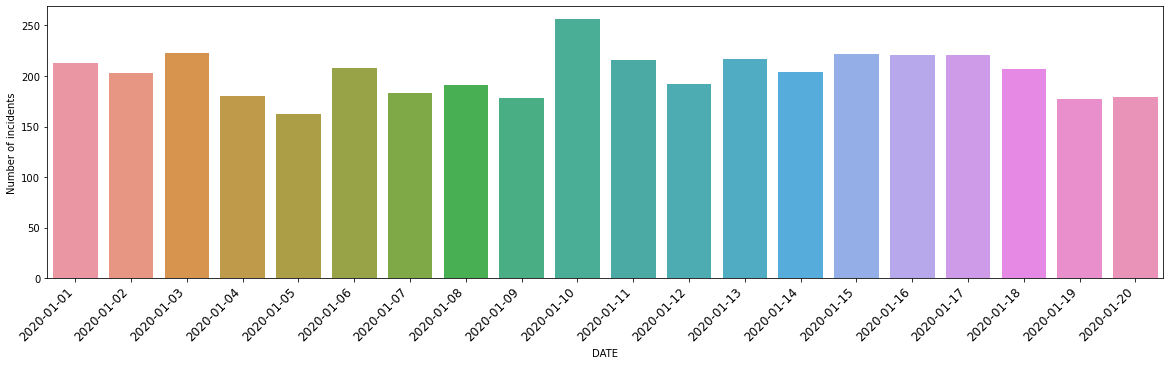

In [392]:
# plot Number of crimes occured on each date
fig, ax = plt.subplots(figsize=(20, 5))
ax.set(ylabel="Number of Crimes", xlabel="Date")
plot=sns.barplot(x="DATE",y="Number of incidents",data=crime_by_date.iloc[0:20,:]) # plotting first 20 days of data
plot.set_xticklabels(plot.get_xticklabels(),rotation=45,
                        horizontalalignment='right',
                        fontweight='light',
                        fontsize='large'
                        )

# out of all months, october month has recorded high number of incindents

<AxesSubplot:xlabel='DATE', ylabel='Number of incidents'>

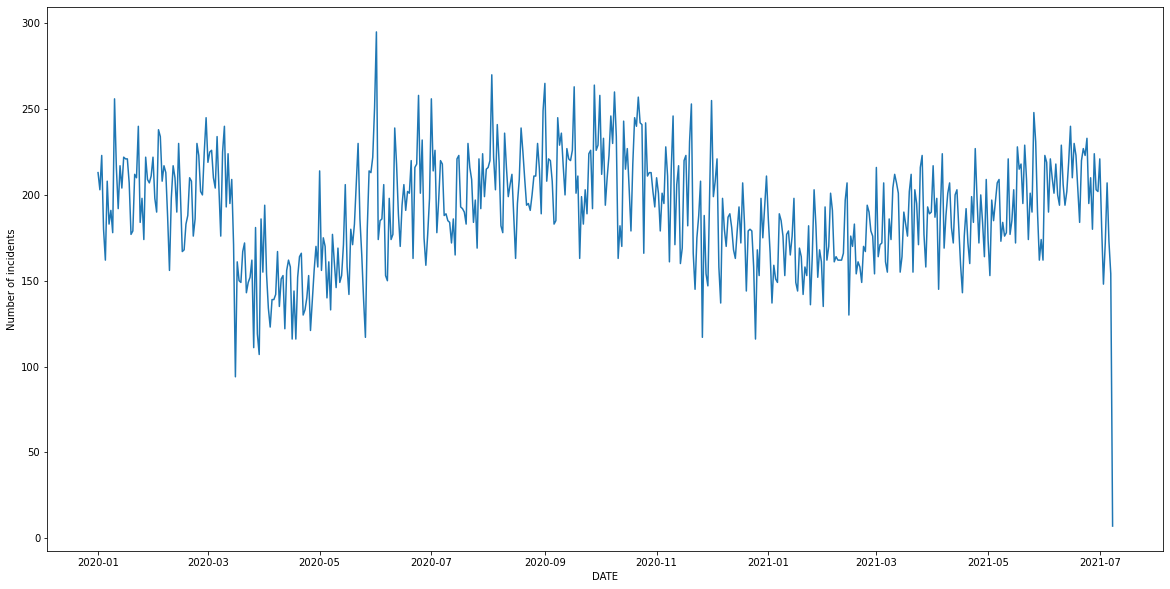

In [393]:
# Observe the pattern in number of crimes on each day by using a line graph
plt.figure(figsize=(20,10))  
sns.lineplot(x="DATE",y="Number of incidents",data=crime_by_date.iloc[:,:])

In [394]:
#By using  MONTH AND YEAR columns. create a new column with cobination of month and year by using dt.to_period()
crime_data["year-month"]=pd.to_datetime(crime_data["OCCURRED_ON_DATE"]).dt.to_period("M")
crime_data


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location,DATE,TIME,year-month
0,854652314,3115,INVESTIGATE PERSON,B2,289,0,2020-02-20 00:00:00,2020,2,Thursday,0,SCHROEDER PLZ,42.333679,-71.091878,"(42.3336792181085, -71.0918775461846)",2020-02-20,00:00:00,2020-02
1,457856954,3115,INVESTIGATE PERSON,B2,289,0,2020-02-21 01:42:00,2020,2,Friday,1,SCHROEDER PLZ,42.333679,-71.091878,"(42.3336792181085, -71.0918775461846)",2020-02-21,01:42:00,2020-02
2,302030654,1106,FRAUD - CREDIT CARD / ATM FRAUD,D4,167,0,2020-04-24 13:00:00,2020,4,Friday,13,MASSACHUSETTS AVE,42.339542,-71.069409,"(42.3395419898301, -71.0694087696754)",2020-04-24,13:00:00,2020-04
3,212025777,1108,FRAUD - WELFARE,A7,28,0,2020-05-01 00:00:00,2020,5,Friday,0,TRENTON ST,42.370818,-71.039291,"(42.3708180467024, -71.0392907813515)",2020-05-01,00:00:00,2020-05
4,212025557,2670,HARASSMENT/ CRIMINAL HARASSMENT,A1,77,0,2020-09-07 00:00:00,2020,9,Monday,0,PRINCE ST,42.361839,-71.059765,"(42.3618385665647, -71.0597648909416)",2020-09-07,00:00:00,2020-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34910,121016052,3831,M/V - LEAVING SCENE - PROPERTY DAMAGE,C11,347,0,2021-03-13 09:10:00,2021,3,Saturday,9,DORCHESTER AVE,42.307289,-71.058499,"(42.3072894059195, -71.0584991240592)",2021-03-13,09:10:00,2021-03
34911,121005808,1102,FRAUD - FALSE PRETENSE / SCHEME,B3,289,0,2021-01-19 12:00:00,2021,1,Tuesday,12,CLARKWOOD ST,42.333679,-71.091878,"(42.3336792181085, -71.0918775461846)",2021-01-19,12:00:00,2021-01
34912,121000816,3304,NOISY PARTY/RADIO-NO ARREST,E5,675,0,2021-01-04 00:00:00,2021,1,Monday,0,BRADFIELD AVENUE,0.000000,0.000000,"(0, 0)",2021-01-04,00:00:00,2021-01
34913,120221042,3006,SICK/INJURED/MEDICAL - PERSON,E5,680,0,2021-04-02 10:45:00,2021,4,Friday,10,WASHINGTON ST,42.283902,-71.130863,"(42.2839024364831, -71.130862626435)",2021-04-02,10:45:00,2021-04


In [395]:
# now plot the number of crimes occured in each month
crime_by_month=pd.DataFrame(crime_data.groupby("year-month").size().rename("no.of incidents").reset_index())
crime_by_month

,year-month,no.of incidents
0,2020-01,6342
1,2020-02,5897
2,2020-03,5513
3,2020-04,4387
4,2020-05,5439
5,2020-06,5925
6,2020-07,6236
7,2020-08,6533
8,2020-09,6484
9,2020-10,6766


<AxesSubplot:xlabel='year-month', ylabel='no.of incidents'>

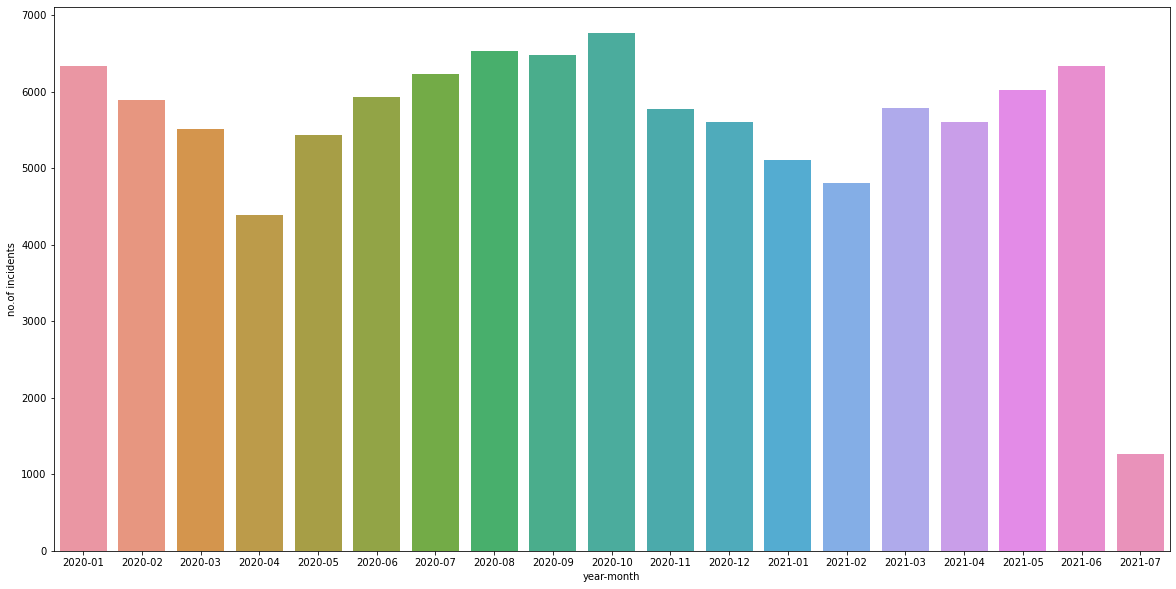

In [396]:
plt.figure(figsize=(20,10))
sns.barplot(x="year-month",y="no.of incidents",data=crime_by_month)

# Middle of the year crime rate is more

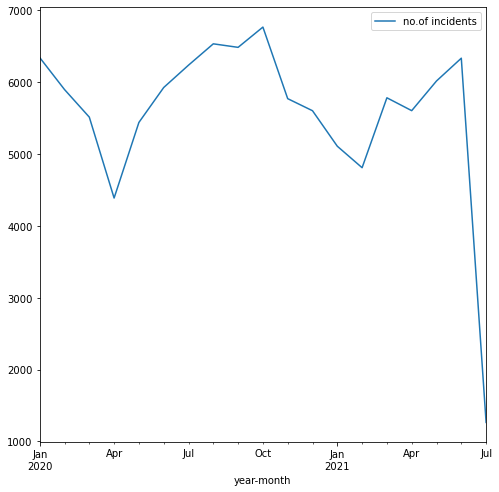

In [397]:
# No.of crimes occured in each month is plotted.
#plt.figure(figsize=(20,10))  
#sns.lineplot(x="year-month",y="no.of incidents",data=crime_by_month.iloc[:,:])
lineplot2 = crime_by_month.plot.line(x="year-month", y="no.of incidents", figsize=(8, 8))

# for both 2020 and  2021, more crimes occured  from may to november


<AxesSubplot:xlabel='DISTRICT'>

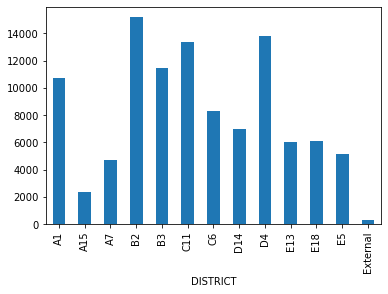

In [398]:
# number of crimes occured in each district
crime_data.groupby("DISTRICT")["INCIDENT_NUMBER"].size().plot(kind="bar")

# Most of the crimes occured in B2,D4,C11, B3 and A1 districts when compared to other districts

In [399]:
crime_data.groupby(['DISTRICT','OFFENSE_CODE'])['INCIDENT_NUMBER'].size()

DISTRICT  OFFENSE_CODE
A1        301             195
          423             299
          520              59
          540             142
          611              29
                         ... 
External  3803              2
          3805             12
          3811              1
          3830              3
          3831             22
Name: INCIDENT_NUMBER, Length: 1311, dtype: int64

In [400]:
a=crime_data.groupby(['DATE','OFFENSE_DESCRIPTION']).size()
a.head(5)

DATE        OFFENSE_DESCRIPTION              
2020-01-01  ASSAULT - AGGRAVATED                  3
            ASSAULT - SIMPLE                     10
            AUTO THEFT                            5
            AUTO THEFT - MOTORCYCLE / SCOOTER     1
            BALLISTICS EVIDENCE/FOUND             1
dtype: int64

In [401]:
crime_data.groupby(['DATE','OFFENSE_DESCRIPTION'])['INCIDENT_NUMBER'].size()

DATE        OFFENSE_DESCRIPTION                                       
2020-01-01  ASSAULT - AGGRAVATED                                           3
            ASSAULT - SIMPLE                                              10
            AUTO THEFT                                                     5
            AUTO THEFT - MOTORCYCLE / SCOOTER                              1
            BALLISTICS EVIDENCE/FOUND                                      1
                                                                          ..
2021-07-08  M/V ACCIDENT - PROPERTY DAMAGE                                 1
            RECOVERED - MV RECOVERED IN BOSTON (STOLEN OUTSIDE BOSTON)     1
            ROBBERY                                                        1
            SICK ASSIST                                                    2
            SICK/INJURED/MEDICAL - PERSON                                  1
Name: INCIDENT_NUMBER, Length: 27732, dtype: int64

In [402]:
# number of times  each crime type occured   
crime_by_offense=pd.DataFrame(crime_data.groupby("OFFENSE_DESCRIPTION").size().sort_values().rename("Count").reset_index())
crime_by_offense

,OFFENSE_DESCRIPTION,Count
0,Evidence Tracker Incidents,1
1,PROSTITUTION - ASSISTING OR PROMOTING,1
2,Justifiable Homicide,1
3,LARCENY THEFT FROM COIN-OP MACHINE,1
4,CONSPIRACY EXCEPT DRUG LAW,2
...,...,...
118,VANDALISM,4925
119,INVESTIGATE PROPERTY,4996
120,M/V - LEAVING SCENE - PROPERTY DAMAGE,5837
121,SICK ASSIST,6721


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'SICK/INJURED/MEDICAL - POLICE'),
  Text(1, 0, 'FRAUD - WELFARE'),
  Text(2, 0, 'ROBBERY'),
  Text(3, 0, 'SICK ASSIST - DRUG RELATED ILLNESS'),
  Text(4, 0, 'FRAUD - IMPERSONATION'),
  Text(5, 0, 'PROPERTY - FOUND'),
  Text(6, 0, 'BURGLARY - RESIDENTIAL'),
  Text(7, 0, 'MISSING PERSON - LOCATED'),
  Text(8, 0, 'LARCENY THEFT OF BICYCLE'),
  Text(9, 0, 'M/V ACCIDENT - PERSONAL INJURY'),
  Text(10, 0, 'AUTO THEFT'),
  Text(11, 0, 'M/V ACCIDENT - OTHER'),
  Text(12, 0, 'HARASSMENT/ CRIMINAL HARASSMENT'),
  Text(13, 0, 'VAL - VIOLATION OF AUTO LAW'),
  Text(14, 0, 'LARCENY ALL OTHERS'),
  Text(15, 0, 'FRAUD - FALSE PRETENSE / SCHEME'),
  Text(16, 0, 'DRUGS - POSSESSION/ SALE/ MANUFACTURING/ USE'),
  Text(17, 0, 'VERBAL DISPUTE'),
  Text(18, 0, 'LARCENY THEFT FROM BUILDING'),
  Text(19, 0, 'ASSAULT - AGGRAVATED'),
  Text(20, 0, 'T

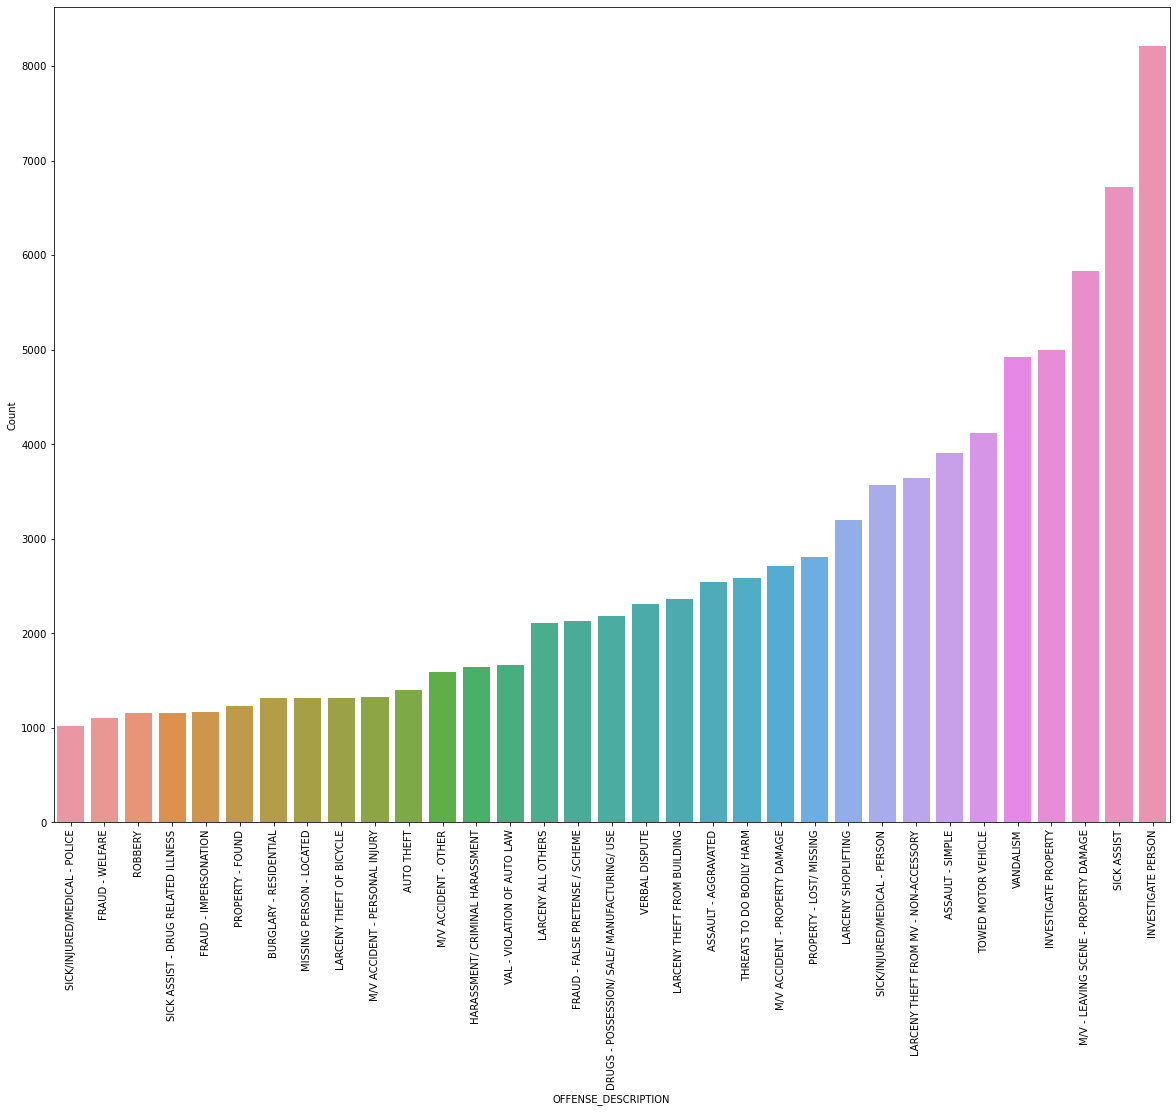

In [403]:
# plotting top 30 crimes occured 
plt.figure(figsize=(20,15))
sns.barplot(x="OFFENSE_DESCRIPTION",y="Count",data=crime_by_offense.iloc[90:,:])
plt.xticks(rotation=90)

# Vandalism, INVESTIGATE PROPERTY, LEAVING SCENE - PROPERTY DAMAGE , SICK ASSIST, INVESTIGATE PERSON  are the top 5 crimes occured.

In [404]:
# type of crimes occured during each month
crime_by_offense_type=pd.DataFrame(crime_data.groupby(["year-month","OFFENSE_DESCRIPTION"]).size().sort_values().rename("Count").reset_index())
crime_by_offense_type

,year-month,OFFENSE_DESCRIPTION,Count
0,2020-02,OPERATING UNDER THE INFLUENCE (OUI) DRUGS,1
1,2021-02,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",1
2,2020-07,INTIMIDATING WITNESS,1
3,2020-07,KIDNAPPING/CUSTODIAL KIDNAPPING/ ABDUCTION,1
4,2021-02,LARCENY PURSE SNATCH - NO FORCE,1
...,...,...,...
1938,2020-10,INVESTIGATE PERSON,487
1939,2021-05,INVESTIGATE PERSON,491
1940,2021-03,INVESTIGATE PERSON,509
1941,2021-04,INVESTIGATE PERSON,531


In [405]:
crime_by_offense_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1943 entries, 0 to 1942
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype    
---  ------               --------------  -----    
 0   year-month           1943 non-null   period[M]
 1   OFFENSE_DESCRIPTION  1943 non-null   object   
 2   Count                1943 non-null   int64    
dtypes: int64(1), object(1), period[M](1)
memory usage: 45.7+ KB


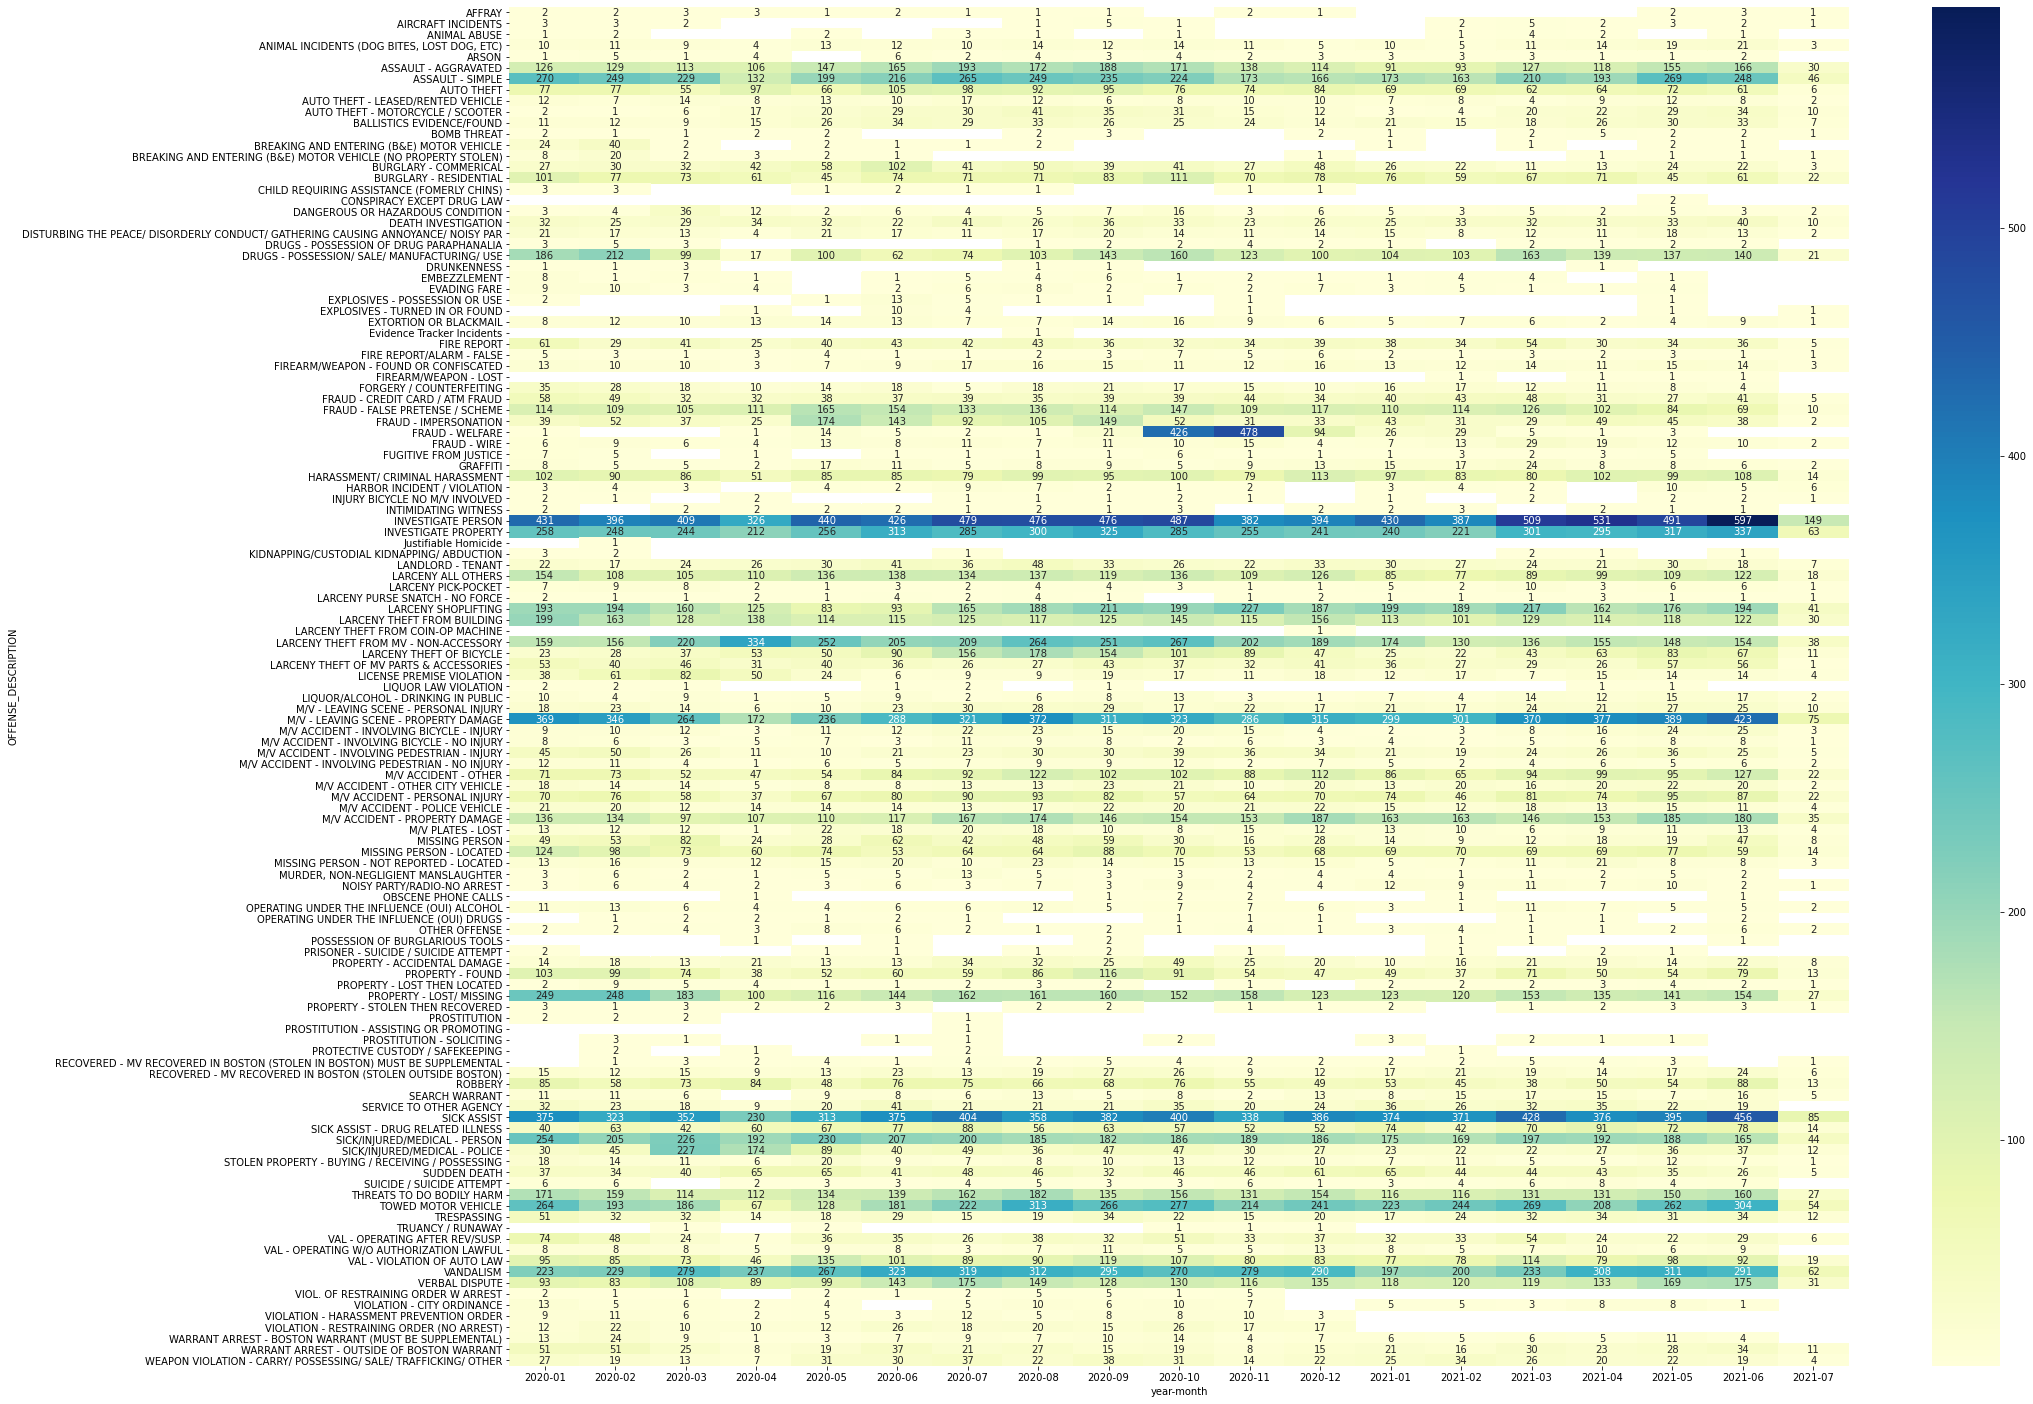

In [406]:
map = crime_by_offense_type.pivot("OFFENSE_DESCRIPTION", "year-month", "Count")
plt.figure(figsize=(30, 25))
ax1 = sns.heatmap(map, annot=True, fmt="0.0f" ,cmap="YlGnBu")

In [407]:
# Analysis of lattide and longitude
crime_data_loc=pd.DataFrame(crime_data.groupby(['Lat', 'Long']).size().sort_values(ascending=False).rename('COUNT').reset_index())
crime_data_loc

,Lat,Long,COUNT
0,42.297555,-71.059709,3839
1,0.000000,0.000000,3090
2,42.339542,-71.069409,2935
3,42.328663,-71.085634,2466
4,42.361839,-71.059765,2168
...,...,...,...
14470,42.316845,-71.085869,1
14471,42.316931,-71.071810,1
14472,42.316935,-71.052969,1
14473,42.371166,-71.062010,1


In [408]:
# we can group them into different clusters by usng different K means clustering technique

In [409]:
#crimes with locations grater than 100
crime_data_max_loc = crime_data_loc[crime_data_loc.COUNT >= 100]
crime_data_max_loc

,Lat,Long,COUNT
0,42.297555,-71.059709,3839
1,0.000000,0.000000,3090
2,42.339542,-71.069409,2935
3,42.328663,-71.085634,2466
4,42.361839,-71.059765,2168
5,42.284826,-71.091374,2050
6,42.349056,-71.150498,1897
7,42.341288,-71.054679,1710
8,42.256216,-71.124019,1680
9,42.287094,-71.148221,1552


In [410]:
# there is a location where lat and long coordinates are 0 and 0 but records 2nd most number of crimes.
#clearly it is a outlier or data is not correct. we can fill that value by using interpolate()


In [411]:
# Grouping date and offense description features  to get on each day, how many crimes occured of a particular typpe
new_data=pd.DataFrame(crime_data.groupby(["DATE","OFFENSE_DESCRIPTION"]).size().rename("Count").reset_index())
new_data

,DATE,OFFENSE_DESCRIPTION,Count
0,2020-01-01,ASSAULT - AGGRAVATED,3
1,2020-01-01,ASSAULT - SIMPLE,10
2,2020-01-01,AUTO THEFT,5
3,2020-01-01,AUTO THEFT - MOTORCYCLE / SCOOTER,1
4,2020-01-01,BALLISTICS EVIDENCE/FOUND,1
...,...,...,...
27727,2021-07-08,M/V ACCIDENT - PROPERTY DAMAGE,1
27728,2021-07-08,RECOVERED - MV RECOVERED IN BOSTON (STOLEN OUT...,1
27729,2021-07-08,ROBBERY,1
27730,2021-07-08,SICK ASSIST,2


In [412]:
# How many crimes occured due to vandalsim on each day 
a=new_data["OFFENSE_DESCRIPTION"]=="VANDALISM"
van_crime=new_data[a]
van_crime

,DATE,OFFENSE_DESCRIPTION,Count
52,2020-01-01,VANDALISM,10
104,2020-01-02,VANDALISM,10
159,2020-01-03,VANDALISM,5
207,2020-01-04,VANDALISM,10
256,2020-01-05,VANDALISM,7
...,...,...,...
27532,2021-07-03,VANDALISM,10
27576,2021-07-04,VANDALISM,13
27626,2021-07-05,VANDALISM,15
27677,2021-07-06,VANDALISM,5


In [413]:
van_crime=van_crime.rename(columns={"Count":"VANDALISM"})

In [414]:
van_crime=van_crime.drop(columns=["OFFENSE_DESCRIPTION"])
van_crime

,DATE,VANDALISM
52,2020-01-01,10
104,2020-01-02,10
159,2020-01-03,5
207,2020-01-04,10
256,2020-01-05,7
...,...,...
27532,2021-07-03,10
27576,2021-07-04,13
27626,2021-07-05,15
27677,2021-07-06,5


In [415]:
# How many crimes occured due to verbal dispute on each day
b=new_data["OFFENSE_DESCRIPTION"]=="VERBAL DISPUTE"
verbal_crime=new_data[b]
verbal_crime

,DATE,OFFENSE_DESCRIPTION,Count
53,2020-01-01,VERBAL DISPUTE,6
105,2020-01-02,VERBAL DISPUTE,5
160,2020-01-03,VERBAL DISPUTE,2
208,2020-01-04,VERBAL DISPUTE,3
257,2020-01-05,VERBAL DISPUTE,1
...,...,...,...
27533,2021-07-03,VERBAL DISPUTE,2
27577,2021-07-04,VERBAL DISPUTE,3
27627,2021-07-05,VERBAL DISPUTE,9
27678,2021-07-06,VERBAL DISPUTE,5


In [416]:
verbal_crime=verbal_crime.rename(columns={"Count":"VERBAL DISPUTE"})

In [417]:
verbal_crime=verbal_crime.drop(columns=["OFFENSE_DESCRIPTION"])
verbal_crime

,DATE,VERBAL DISPUTE
53,2020-01-01,6
105,2020-01-02,5
160,2020-01-03,2
208,2020-01-04,3
257,2020-01-05,1
...,...,...
27533,2021-07-03,2
27577,2021-07-04,3
27627,2021-07-05,9
27678,2021-07-06,5


In [418]:
van_crime["DATE"]=pd.to_datetime(van_crime["DATE"])
van_crime.dtypes

DATE         datetime64[ns]
VANDALISM             int64
dtype: object

In [419]:
verbal_crime["DATE"]=pd.to_datetime(verbal_crime["DATE"])
verbal_crime.dtypes

DATE              datetime64[ns]
VERBAL DISPUTE             int64
dtype: object

In [420]:
crime_required=van_crime.merge(verbal_crime,how="left",on="DATE")
crime_required

,DATE,VANDALISM,VERBAL DISPUTE
0,2020-01-01,10,6.0
1,2020-01-02,10,5.0
2,2020-01-03,5,2.0
3,2020-01-04,10,3.0
4,2020-01-05,7,1.0
...,...,...,...
549,2021-07-03,10,2.0
550,2021-07-04,13,3.0
551,2021-07-05,15,9.0
552,2021-07-06,5,5.0


In [421]:
crime_required["VERBAL DISPUTE"]=crime_required["VERBAL DISPUTE"].fillna(0)
crime_required

,DATE,VANDALISM,VERBAL DISPUTE
0,2020-01-01,10,6.0
1,2020-01-02,10,5.0
2,2020-01-03,5,2.0
3,2020-01-04,10,3.0
4,2020-01-05,7,1.0
...,...,...,...
549,2021-07-03,10,2.0
550,2021-07-04,13,3.0
551,2021-07-05,15,9.0
552,2021-07-06,5,5.0


In [422]:
crime_required.to_csv("required.csv",index=False)

K=pd.read_csv("required.csv")
K.dtypes


DATE               object
VANDALISM           int64
VERBAL DISPUTE    float64
dtype: object

In [423]:
#splitting a date column into separate year, month, day .
K['DATE'] = pd.to_datetime(K.DATE)
K["year"]=K.DATE.dt.year
K['month'] = K['DATE'].dt.month
K['day'] = K['DATE'].dt.day

In [424]:
K

,DATE,VANDALISM,VERBAL DISPUTE,year,month,day
0,2020-01-01,10,6.0,2020,1,1
1,2020-01-02,10,5.0,2020,1,2
2,2020-01-03,5,2.0,2020,1,3
3,2020-01-04,10,3.0,2020,1,4
4,2020-01-05,7,1.0,2020,1,5
...,...,...,...,...,...,...
549,2021-07-03,10,2.0,2021,7,3
550,2021-07-04,13,3.0,2021,7,4
551,2021-07-05,15,9.0,2021,7,5
552,2021-07-06,5,5.0,2021,7,6


In [425]:
K=K.drop(columns=["DATE"])
K

,VANDALISM,VERBAL DISPUTE,year,month,day
0,10,6.0,2020,1,1
1,10,5.0,2020,1,2
2,5,2.0,2020,1,3
3,10,3.0,2020,1,4
4,7,1.0,2020,1,5
...,...,...,...,...,...
549,10,2.0,2021,7,3
550,13,3.0,2021,7,4
551,15,9.0,2021,7,5
552,5,5.0,2021,7,6


In [426]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [427]:
X=K.iloc[:,2:5]

print(X)


     year  month  day
0    2020      1    1
1    2020      1    2
2    2020      1    3
3    2020      1    4
4    2020      1    5
..    ...    ...  ...
549  2021      7    3
550  2021      7    4
551  2021      7    5
552  2021      7    6
553  2021      7    7

[554 rows x 3 columns]


In [428]:
Y=K[["VANDALISM","VERBAL DISPUTE"]]
Y

,VANDALISM,VERBAL DISPUTE
0,10,6.0
1,10,5.0
2,5,2.0
3,10,3.0
4,7,1.0
...,...,...
549,10,2.0
550,13,3.0
551,15,9.0
552,5,5.0


In [429]:
X.shape

(554, 3)

In [430]:
Y.shape

(554, 2)

In [431]:
X=X.values.reshape(X.shape[0],X.shape[1],1)

In [432]:
X.shape

(554, 3, 1)

In [433]:
in_dim=(X.shape[1],X.shape[2])
in_dim

(3, 1)

In [434]:
out_dim=Y.shape[1]
out_dim

2

In [435]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.15)
print(X_train, X_test, Y_train, Y_test)

[[[2020]
  [  10]
  [  16]]

 [[2020]
  [   3]
  [   6]]

 [[2021]
  [   3]
  [   6]]

 ...

 [[2021]
  [   6]
  [   6]]

 [[2021]
  [   3]
  [  28]]

 [[2020]
  [  12]
  [  31]]] [[[2020]
  [   8]
  [  22]]

 [[2020]
  [  12]
  [  19]]

 [[2021]
  [   3]
  [   5]]

 [[2020]
  [  10]
  [   5]]

 [[2021]
  [   1]
  [  23]]

 [[2020]
  [   1]
  [   3]]

 [[2020]
  [   9]
  [   3]]

 [[2021]
  [   6]
  [  20]]

 [[2020]
  [   5]
  [  29]]

 [[2021]
  [   4]
  [  21]]

 [[2020]
  [  11]
  [  18]]

 [[2021]
  [   6]
  [   4]]

 [[2020]
  [   5]
  [  15]]

 [[2021]
  [   4]
  [  26]]

 [[2020]
  [   6]
  [  25]]

 [[2020]
  [   7]
  [  26]]

 [[2021]
  [   6]
  [  11]]

 [[2020]
  [  12]
  [   7]]

 [[2020]
  [   2]
  [  21]]

 [[2020]
  [   3]
  [  16]]

 [[2020]
  [   5]
  [  21]]

 [[2020]
  [   8]
  [  26]]

 [[2020]
  [  10]
  [  30]]

 [[2020]
  [   3]
  [  28]]

 [[2020]
  [  12]
  [   5]]

 [[2020]
  [   9]
  [   7]]

 [[2021]
  [   2]
  [   8]]

 [[2020]
  [   4]
  [  14]]

 [[2020]

In [436]:
X_test

array([[[2020],
        [   8],
        [  22]],

       [[2020],
        [  12],
        [  19]],

       [[2021],
        [   3],
        [   5]],

       [[2020],
        [  10],
        [   5]],

       [[2021],
        [   1],
        [  23]],

       [[2020],
        [   1],
        [   3]],

       [[2020],
        [   9],
        [   3]],

       [[2021],
        [   6],
        [  20]],

       [[2020],
        [   5],
        [  29]],

       [[2021],
        [   4],
        [  21]],

       [[2020],
        [  11],
        [  18]],

       [[2021],
        [   6],
        [   4]],

       [[2020],
        [   5],
        [  15]],

       [[2021],
        [   4],
        [  26]],

       [[2020],
        [   6],
        [  25]],

       [[2020],
        [   7],
        [  26]],

       [[2021],
        [   6],
        [  11]],

       [[2020],
        [  12],
        [   7]],

       [[2020],
        [   2],
        [  21]],

       [[2020],
        [   3],
        [  16]],



In [437]:
model = Sequential()
model.add(LSTM(64, input_shape=in_dim, activation="relu"))
model.add(Dense(out_dim))
model.compile(loss="mse",optimizer="adam")

In [438]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 64)                16896     
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 130       
Total params: 17,026
Trainable params: 17,026
Non-trainable params: 0
_________________________________________________________________


In [439]:
model.fit(X_train, Y_train,verbose=0)

In [440]:
Y_test

,VANDALISM,VERBAL DISPUTE
234,4,3.0
353,11,1.0
429,7,6.0
278,8,1.0
388,8,5.0
...,...,...
428,4,3.0
332,7,4.0
382,3,4.0
189,13,8.0


In [441]:
Y_pred=model.predict(X_test)
Y_pred

array([[12.846695 ,  2.3257868],
       [12.750985 ,  2.9520848],
       [11.919277 ,  7.455036 ],
       [12.098079 ,  7.16265  ],
       [12.76386  ,  2.3331685],
       [11.826056 ,  8.242472 ],
       [12.037858 ,  7.888063 ],
       [12.68205  ,  2.8729491],
       [13.151058 ,  1.0544786],
       [12.702851 ,  2.6944304],
       [12.662181 ,  3.2294304],
       [11.978048 ,  7.6658483],
       [12.348591 ,  4.2425528],
       [12.997234 ,  1.6110345],
       [12.9813175,  1.7389508],
       [13.057032 ,  1.5111312],
       [12.180632 ,  5.3882775],
       [12.19939  ,  6.4555044],
       [12.654782 ,  2.7606323],
       [12.361631 ,  4.034199 ],
       [12.7187195,  2.6581028],
       [13.079134 ,  1.4797689],
       [13.303357 ,  0.7412081],
       [13.0649185,  1.2846118],
       [12.155763 ,  7.1199985],
       [12.116203 ,  6.5339932],
       [11.972988 ,  6.499306 ],
       [12.271147 ,  4.566854 ],
       [12.340391 ,  4.4574122],
       [12.038291 ,  6.6501565],
       [12

In [442]:
print("y1 MSE:%.4f" % mean_absolute_error(Y_test.iloc[0:,0], Y_pred[0:,0]))
print("y2 MSE:%.4f" % mean_absolute_error(Y_test.iloc[0:,1], Y_pred[0:,1]))

y1 MSE:4.8352
y2 MSE:2.8579


In [443]:
# creating a test data set of dates ranging from july 9 th december 31
a=pd.date_range(start='2021-07-09', end='2021-12-31')

X_test_data=a

In [444]:
X_test_data=pd.DataFrame(X_test_data)
X_test_data.columns=["Date"]
X_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    176 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.5 KB


In [445]:

X_test_data["year"]=X_test_data.Date.dt.year
X_test_data['month'] = X_test_data['Date'].dt.month
X_test_data['day'] = X_test_data['Date'].dt.day
X_test_data

,Date,year,month,day
0,2021-07-09,2021,7,9
1,2021-07-10,2021,7,10
2,2021-07-11,2021,7,11
3,2021-07-12,2021,7,12
4,2021-07-13,2021,7,13
...,...,...,...,...
171,2021-12-27,2021,12,27
172,2021-12-28,2021,12,28
173,2021-12-29,2021,12,29
174,2021-12-30,2021,12,30


In [446]:
X_test_data=X_test_data.drop(columns=["Date"])

In [447]:
X_test_data

,year,month,day
0,2021,7,9
1,2021,7,10
2,2021,7,11
3,2021,7,12
4,2021,7,13
...,...,...,...
171,2021,12,27
172,2021,12,28
173,2021,12,29
174,2021,12,30


In [448]:
X_test_data=X_test_data.values.reshape(X_test_data.shape[0],X_test_data.shape[1],1)


In [449]:
X_test_data.shape

(176, 3, 1)

In [450]:
input_dim=(X.shape[1],X.shape[2])
input_dim

(3, 1)

In [451]:
df=model.predict(X_test_data)
df 

array([[12.1298    ,  5.9710207 ],
       [12.165491  ,  5.6580634 ],
       [12.204976  ,  5.3506474 ],
       [12.248248  ,  5.0486684 ],
       [12.295247  ,  4.752072  ],
       [12.345803  ,  4.460883  ],
       [12.399677  ,  4.175222  ],
       [12.456531  ,  3.8952854 ],
       [12.515931  ,  3.62139   ],
       [12.577352  ,  3.353948  ],
       [12.640197  ,  3.0934577 ],
       [12.703808  ,  2.8404763 ],
       [12.767487  ,  2.5956197 ],
       [12.830509  ,  2.3594935 ],
       [12.892193  ,  2.132691  ],
       [12.951864  ,  1.915743  ],
       [13.008935  ,  1.7091027 ],
       [13.062872  ,  1.5130914 ],
       [13.113258  ,  1.3279315 ],
       [13.159771  ,  1.1536802 ],
       [13.202174  ,  0.9902806 ],
       [13.240344  ,  0.83752877],
       [13.2742405 ,  0.69512206],
       [11.993137  ,  8.647078  ],
       [12.00338   ,  8.286348  ],
       [12.016068  ,  7.931723  ],
       [12.031406  ,  7.5833    ],
       [12.049617  ,  7.2411127 ],
       [12.070902  ,

In [452]:
df2=pd.DataFrame(df)
df2.columns=["VANDALISM","VERBAL DISPUTE"]


In [453]:
final=df2.join(pd.DataFrame(a),)
final


,VANDALISM,VERBAL DISPUTE,0
0,12.129800,5.971021,2021-07-09
1,12.165491,5.658063,2021-07-10
2,12.204976,5.350647,2021-07-11
3,12.248248,5.048668,2021-07-12
4,12.295247,4.752072,2021-07-13
...,...,...,...
171,13.229257,1.183707,2021-12-27
172,13.276538,1.007735,2021-12-28
173,13.319784,0.842540,2021-12-29
174,13.358829,0.687967,2021-12-30


In [454]:
final.columns=["VANDALISM","VERBAL DISPUTE","DATE"]
final

,VANDALISM,VERBAL DISPUTE,DATE
0,12.129800,5.971021,2021-07-09
1,12.165491,5.658063,2021-07-10
2,12.204976,5.350647,2021-07-11
3,12.248248,5.048668,2021-07-12
4,12.295247,4.752072,2021-07-13
...,...,...,...
171,13.229257,1.183707,2021-12-27
172,13.276538,1.007735,2021-12-28
173,13.319784,0.842540,2021-12-29
174,13.358829,0.687967,2021-12-30


In [455]:
final=final[["DATE","VANDALISM","VERBAL DISPUTE"]]
final

,DATE,VANDALISM,VERBAL DISPUTE
0,2021-07-09,12.129800,5.971021
1,2021-07-10,12.165491,5.658063
2,2021-07-11,12.204976,5.350647
3,2021-07-12,12.248248,5.048668
4,2021-07-13,12.295247,4.752072
...,...,...,...
171,2021-12-27,13.229257,1.183707
172,2021-12-28,13.276538,1.007735
173,2021-12-29,13.319784,0.842540
174,2021-12-30,13.358829,0.687967


In [456]:
final.to_csv("crime_pred.csv",index=False)

# Part 2

market1_train.csv contains time series observations for 100 different entities ID0, ID1, ..., ID99. market2_train.csv is similar. You will find that there is some correlation across entities within a market and that the two markets are independent of each other.

For each entity in each market, predict the value of the time series for the next 20 time periods (2021-07-10 through 2021-07-29). Save your predictions for the first dataset in a csv file named market1_pred.csv with the same format as market1_train.csv (and similarly for predictions on the second dataset).

When assessing your submission, we will note the accuracy of your predictions, but mostly we will focus on whether you made an effort to validate your model's performance using a hold-out test set. Be sure to pursue a validation strategy that respects the time series nature of the data.

In [457]:
import pandas as pd

market1 = pd.read_csv('./market1_train.csv', index_col=0)
market1.tail()

,ID0,ID1,ID2,ID3,ID4,ID5,ID6,ID7,ID8,ID9,...,ID90,ID91,ID92,ID93,ID94,ID95,ID96,ID97,ID98,ID99
2021-07-05,3.583375,3.226964,2.346920,2.558637,1.538760,4.594758,2.146608,-0.386454,5.025999,1.725205,...,3.297692,2.530733,1.443641,4.868712,3.445038,1.935061,0.067948,1.430985,3.682066,0.823618
2021-07-06,3.517965,3.204598,2.314079,2.632919,1.536916,4.571775,2.141673,-0.399738,5.018209,1.698755,...,3.342837,2.570519,1.493459,4.806316,3.450563,1.944582,-0.008034,1.443509,3.673936,0.804096
2021-07-07,3.424292,3.158055,2.323530,2.712472,1.518457,4.564601,2.174367,-0.457701,5.016744,1.687332,...,3.379711,2.629063,1.500382,4.703795,3.465800,1.951739,-0.034730,1.416805,3.708597,0.828704
2021-07-08,3.324116,3.132059,2.357117,2.717007,1.528890,4.605934,2.233432,-0.539993,4.998563,1.730982,...,3.422676,2.690800,1.523709,4.635425,3.529254,1.946570,-0.040312,1.407013,3.733810,0.825763
2021-07-09,3.280630,3.125787,2.358661,2.714038,1.534618,4.644007,2.255994,-0.570467,4.947899,1.801011,...,3.486283,2.700701,1.530790,4.637559,3.600928,1.973549,-0.028652,1.409580,3.713170,0.797180


In [458]:
market1=pd.read_csv("market1_train.csv",index_col=0)
market1

,ID0,ID1,ID2,ID3,ID4,ID5,ID6,ID7,ID8,ID9,...,ID90,ID91,ID92,ID93,ID94,ID95,ID96,ID97,ID98,ID99
2020-06-05,0.923487,0.636462,0.196549,1.642406,-0.414307,0.116535,1.649359,0.293712,1.709098,1.369384,...,1.290142,1.496324,2.075854,2.306605,2.616544,1.408431,3.086423,1.354975,1.432395,1.079595
2020-06-06,0.896356,0.646727,0.204878,1.686402,-0.461970,0.177137,1.679471,0.315517,1.750805,1.430578,...,1.347296,1.466972,2.111017,2.330013,2.684699,1.394628,3.125490,1.359158,1.453486,1.049957
2020-06-07,0.859538,0.671035,0.217357,1.754765,-0.536844,0.245349,1.705559,0.318119,1.808494,1.459136,...,1.295629,1.488738,2.197938,2.378117,2.680846,1.387548,3.124174,1.394836,1.430801,1.042166
2020-06-08,0.815306,0.693654,0.278475,1.818276,-0.579563,0.237258,1.697547,0.327056,1.834256,1.460969,...,1.238755,1.511074,2.306575,2.413993,2.653495,1.399223,3.135231,1.493550,1.429988,1.021791
2020-06-09,0.829723,0.732132,0.340230,1.804146,-0.566695,0.142860,1.717941,0.342722,1.860003,1.422479,...,1.207137,1.505158,2.387970,2.425192,2.633347,1.443261,3.169891,1.546938,1.434800,1.000036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-05,3.583375,3.226964,2.346920,2.558637,1.538760,4.594758,2.146608,-0.386454,5.025999,1.725205,...,3.297692,2.530733,1.443641,4.868712,3.445038,1.935061,0.067948,1.430985,3.682066,0.823618
2021-07-06,3.517965,3.204598,2.314079,2.632919,1.536916,4.571775,2.141673,-0.399738,5.018209,1.698755,...,3.342837,2.570519,1.493459,4.806316,3.450563,1.944582,-0.008034,1.443509,3.673936,0.804096
2021-07-07,3.424292,3.158055,2.323530,2.712472,1.518457,4.564601,2.174367,-0.457701,5.016744,1.687332,...,3.379711,2.629063,1.500382,4.703795,3.465800,1.951739,-0.034730,1.416805,3.708597,0.828704
2021-07-08,3.324116,3.132059,2.357117,2.717007,1.528890,4.605934,2.233432,-0.539993,4.998563,1.730982,...,3.422676,2.690800,1.523709,4.635425,3.529254,1.946570,-0.040312,1.407013,3.733810,0.825763


In [459]:
market1.head()

,ID0,ID1,ID2,ID3,ID4,ID5,ID6,ID7,ID8,ID9,...,ID90,ID91,ID92,ID93,ID94,ID95,ID96,ID97,ID98,ID99
2020-06-05,0.923487,0.636462,0.196549,1.642406,-0.414307,0.116535,1.649359,0.293712,1.709098,1.369384,...,1.290142,1.496324,2.075854,2.306605,2.616544,1.408431,3.086423,1.354975,1.432395,1.079595
2020-06-06,0.896356,0.646727,0.204878,1.686402,-0.461970,0.177137,1.679471,0.315517,1.750805,1.430578,...,1.347296,1.466972,2.111017,2.330013,2.684699,1.394628,3.125490,1.359158,1.453486,1.049957
2020-06-07,0.859538,0.671035,0.217357,1.754765,-0.536844,0.245349,1.705559,0.318119,1.808494,1.459136,...,1.295629,1.488738,2.197938,2.378117,2.680846,1.387548,3.124174,1.394836,1.430801,1.042166
2020-06-08,0.815306,0.693654,0.278475,1.818276,-0.579563,0.237258,1.697547,0.327056,1.834256,1.460969,...,1.238755,1.511074,2.306575,2.413993,2.653495,1.399223,3.135231,1.493550,1.429988,1.021791
2020-06-09,0.829723,0.732132,0.340230,1.804146,-0.566695,0.142860,1.717941,0.342722,1.860003,1.422479,...,1.207137,1.505158,2.387970,2.425192,2.633347,1.443261,3.169891,1.546938,1.434800,1.000036


In [460]:
df1=market1.reset_index()['ID0']
df1


0      0.923487
1      0.896356
2      0.859538
3      0.815306
4      0.829723
         ...   
395    3.583375
396    3.517965
397    3.424292
398    3.324116
399    3.280630
Name: ID0, Length: 400, dtype: float64

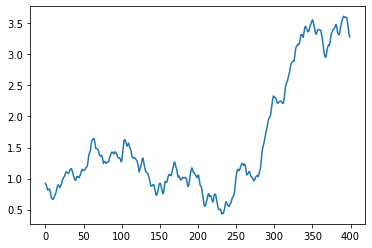

In [461]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [462]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.15468931],
       [0.14616102],
       [0.13458756],
       [0.12068363],
       [0.12521539],
       [0.12596902],
       [0.11960688],
       [0.09774668],
       [0.07916592],
       [0.07748467],
       [0.07300465],
       [0.0798308 ],
       [0.09264673],
       [0.09758352],
       [0.11128133],
       [0.12734216],
       [0.14379404],
       [0.1475495 ],
       [0.13969256],
       [0.13269815],
       [0.1417037 ],
       [0.151057  ],
       [0.16842227],
       [0.17692378],
       [0.18453679],
       [0.19118881],
       [0.20300403],
       [0.21159134],
       [0.21168455],
       [0.20745508],
       [0.20525056],
       [0.20811507],
       [0.22152308],
       [0.22767188],
       [0.22863272],
       [0.2195016 ],
       [0.20470946],
       [0.19041069],
       [0.17947781],
       [0.17059294],
       [0.17183482],
       [0.18768885],
       [0.18969456],
       [0.18482569],
       [0.18384065],
       [0.19191735],
       [0.19961982],
       [0.214

In [463]:
df1.shape

(400, 1)

In [464]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.75)
test_size=len(df1)-training_size
train_data=df1[0:training_size,:]
test_data=df1[training_size:len(df1),:1]

In [465]:
training_size

300

In [466]:
test_size

100

In [467]:
train_data

array([[0.15468931],
       [0.14616102],
       [0.13458756],
       [0.12068363],
       [0.12521539],
       [0.12596902],
       [0.11960688],
       [0.09774668],
       [0.07916592],
       [0.07748467],
       [0.07300465],
       [0.0798308 ],
       [0.09264673],
       [0.09758352],
       [0.11128133],
       [0.12734216],
       [0.14379404],
       [0.1475495 ],
       [0.13969256],
       [0.13269815],
       [0.1417037 ],
       [0.151057  ],
       [0.16842227],
       [0.17692378],
       [0.18453679],
       [0.19118881],
       [0.20300403],
       [0.21159134],
       [0.21168455],
       [0.20745508],
       [0.20525056],
       [0.20811507],
       [0.22152308],
       [0.22767188],
       [0.22863272],
       [0.2195016 ],
       [0.20470946],
       [0.19041069],
       [0.17947781],
       [0.17059294],
       [0.17183482],
       [0.18768885],
       [0.18969456],
       [0.18482569],
       [0.18384065],
       [0.19191735],
       [0.19961982],
       [0.214

In [468]:
test_data

array([[0.58985461],
       [0.58997411],
       [0.58630832],
       [0.5767052 ],
       [0.5604466 ],
       [0.56041814],
       [0.56542833],
       [0.56924606],
       [0.57056342],
       [0.57020139],
       [0.56405397],
       [0.55909881],
       [0.56122919],
       [0.58419902],
       [0.61624262],
       [0.64833358],
       [0.66269993],
       [0.66908502],
       [0.68539101],
       [0.70160835],
       [0.71740988],
       [0.74010992],
       [0.75845633],
       [0.76736034],
       [0.77052911],
       [0.77242283],
       [0.77274081],
       [0.80162771],
       [0.83483932],
       [0.84681257],
       [0.85049183],
       [0.85836711],
       [0.85541556],
       [0.86498302],
       [0.88347712],
       [0.90615651],
       [0.90854126],
       [0.90038436],
       [0.89355266],
       [0.91746195],
       [0.94363043],
       [0.94933464],
       [0.93898449],
       [0.93383503],
       [0.92200466],
       [0.92210022],
       [0.93403618],
       [0.951

In [469]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [470]:
time_step = 50
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [471]:
X_train

array([[0.15468931, 0.14616102, 0.13458756, ..., 0.21404838, 0.22580864,
        0.22161792],
       [0.14616102, 0.13458756, 0.12068363, ..., 0.22580864, 0.22161792,
        0.21822913],
       [0.13458756, 0.12068363, 0.12521539, ..., 0.22161792, 0.21822913,
        0.22189516],
       ...,
       [0.08668279, 0.09417521, 0.11249763, ..., 0.48279641, 0.4892303 ,
        0.49699612],
       [0.09417521, 0.11249763, 0.1481943 , ..., 0.4892303 , 0.49699612,
        0.52657552],
       [0.11249763, 0.1481943 , 0.18848269, ..., 0.49699612, 0.52657552,
        0.55351012]])

In [472]:
print(X_train.shape)
print(y_train.shape)

(249, 50)
(249,)


In [473]:
print(X_test.shape)
print(ytest.shape)

(49, 50)
(49,)


In [474]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [475]:
print(X_train.shape)
print(y_train.shape)

(249, 50, 1)
(249,)


In [476]:
### Create the Stacked LSTM model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [477]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(50,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [478]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 50, 50)            10400     
_________________________________________________________________
lstm_14 (LSTM)               (None, 50, 50)            20200     
_________________________________________________________________
lstm_15 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [479]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
4/4 [==============================] - 6s 398ms/step - loss: 0.0339 - val_loss: 0.0259
Epoch 2/100
4/4 [==============================] - 0s 58ms/step - loss: 0.0115 - val_loss: 0.0585
Epoch 3/100
4/4 [==============================] - 0s 57ms/step - loss: 0.0069 - val_loss: 0.1756
Epoch 4/100
4/4 [==============================] - 0s 61ms/step - loss: 0.0084 - val_loss: 0.1215
Epoch 5/100
4/4 [==============================] - 0s 52ms/step - loss: 0.0064 - val_loss: 0.0480
Epoch 6/100
4/4 [==============================] - 0s 64ms/step - loss: 0.0066 - val_loss: 0.0559
Epoch 7/100
4/4 [==============================] - 0s 61ms/step - loss: 0.0059 - val_loss: 0.0878
Epoch 8/100
4/4 [==============================] - 0s 56ms/step - loss: 0.0063 - val_loss: 0.0812
Epoch 9/100
4/4 [==============================] - 0s 61ms/step - loss: 0.0055 - val_loss: 0.0424
Epoch 10/100
4/4 [==============================] - 0s 59ms/step - loss: 0.0046 - val_loss: 0.0244
Epoch 11/100
4/4 [

In [480]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
print(train_predict)

[[0.22612628]
 [0.23063567]
 [0.23119907]
 [0.22988202]
 [0.22961073]
 [0.23102158]
 [0.23431255]
 [0.2445034 ]
 [0.264728  ]
 [0.29002184]
 [0.3140066 ]
 [0.33983225]
 [0.366311  ]
 [0.38727257]
 [0.39904246]
 [0.40013927]
 [0.3869307 ]
 [0.36005333]
 [0.3327195 ]
 [0.3143786 ]
 [0.30600694]
 [0.3027109 ]
 [0.29816887]
 [0.2933321 ]
 [0.29198593]
 [0.29321745]
 [0.29141062]
 [0.28158683]
 [0.27157977]
 [0.26448965]
 [0.25979406]
 [0.25678086]
 [0.25678933]
 [0.2589058 ]
 [0.26181632]
 [0.26904702]
 [0.28054813]
 [0.29415014]
 [0.307495  ]
 [0.31650826]
 [0.31753954]
 [0.31254533]
 [0.30805132]
 [0.3048141 ]
 [0.3011965 ]
 [0.295577  ]
 [0.28696904]
 [0.277964  ]
 [0.27206668]
 [0.26897886]
 [0.2646302 ]
 [0.26080748]
 [0.26745608]
 [0.29080683]
 [0.3293947 ]
 [0.36952856]
 [0.39587703]
 [0.39979535]
 [0.38339773]
 [0.3616098 ]
 [0.34695405]
 [0.33687475]
 [0.32890868]
 [0.320654  ]
 [0.30791813]
 [0.29167527]
 [0.27841544]
 [0.2709418 ]
 [0.26989   ]
 [0.27229735]
 [0.2745618 ]
 [0.27

In [481]:
print(test_predict)

[[1.2821695]
 [1.3002092]
 [1.3044819]
 [1.2908301]
 [1.266278 ]
 [1.2383815]
 [1.2180542]
 [1.2180455]
 [1.2339889]
 [1.2504586]
 [1.2580925]
 [1.2566417]
 [1.2495257]
 [1.2307596]
 [1.2030351]
 [1.1640022]
 [1.1195693]
 [1.079779 ]
 [1.052989 ]
 [1.0454069]
 [1.0622276]
 [1.0911683]
 [1.1165706]
 [1.1237932]
 [1.1228302]
 [1.1326435]
 [1.1549393]
 [1.1755176]
 [1.1905814]
 [1.1987514]
 [1.2039834]
 [1.2136375]
 [1.2279433]
 [1.232655 ]
 [1.2190856]
 [1.1990846]
 [1.1873252]
 [1.1937647]
 [1.2221226]
 [1.2595823]
 [1.293842 ]
 [1.3176146]
 [1.3304353]
 [1.3316283]
 [1.326331 ]
 [1.3240985]
 [1.3233446]
 [1.3136467]
 [1.2890675]]


In [482]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
print(train_predict.shape)

(249, 1)


In [483]:
print(test_predict)

[[4.5102825]
 [4.5676713]
 [4.581264 ]
 [4.537834 ]
 [4.459728 ]
 [4.370982 ]
 [4.306316 ]
 [4.3062882]
 [4.357008 ]
 [4.4094024]
 [4.4336877]
 [4.4290724]
 [4.4064345]
 [4.346735 ]
 [4.2585363]
 [4.1343627]
 [3.9930108]
 [3.8664281]
 [3.7812023]
 [3.7570817]
 [3.8105927]
 [3.9026601]
 [3.9834712]
 [4.0064483]
 [4.0033846]
 [4.034603 ]
 [4.1055317]
 [4.170996 ]
 [4.2189183]
 [4.244909 ]
 [4.2615533]
 [4.292265 ]
 [4.3377757]
 [4.3527646]
 [4.309597 ]
 [4.245969 ]
 [4.2085595]
 [4.229045 ]
 [4.319258 ]
 [4.438427 ]
 [4.5474157]
 [4.623042 ]
 [4.663828 ]
 [4.6676235]
 [4.6507716]
 [4.643669 ]
 [4.6412706]
 [4.6104193]
 [4.532227 ]]


In [484]:
test_predict.shape

(49, 1)

In [485]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.9292385882596463

In [486]:
math.sqrt(mean_squared_error(ytest,test_predict))

3.3898908905940903

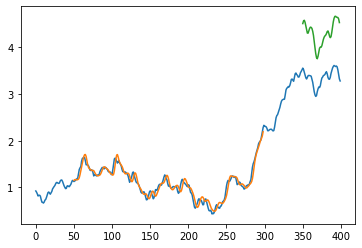

In [487]:
import numpy
### Plotting 
# shift train predictions for plotting
look_back=50
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot((scaler.inverse_transform(df1)))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [488]:
len(test_data)

100

In [489]:
x_input=test_data[50:].reshape(1,-1)
print(x_input.shape)
print(x_input)

(1, 50)
[[0.98209458 0.9728646  0.95426452 0.93648628 0.916904   0.90876354
  0.92081716 0.93139053 0.93316087 0.93218427 0.93051492 0.9274289
  0.90635201 0.88707616 0.85284694 0.8232251  0.8019118  0.79156183
  0.79711124 0.82329449 0.84225334 0.85506094 0.8512588  0.86375016
  0.89241985 0.91516306 0.92161474 0.93182124 0.93467946 0.93924789
  0.9501952  0.95807294 0.94417345 0.91992344 0.90854505 0.90697139
  0.91909034 0.94585457 0.96520038 0.98230537 0.99317974 1.
  0.9963037  0.99295821 0.99628743 0.9908037  0.97024258 0.94079711
  0.90930765 0.89563806]]


In [490]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [491]:
temp_input

[0.9820945836159892,
 0.9728645961354329,
 0.9542645232169603,
 0.9364862777281852,
 0.9169039953373429,
 0.9087635442009055,
 0.9208171597888174,
 0.9313905296684403,
 0.9331608744114622,
 0.932184268249136,
 0.9305149169148227,
 0.9274289026010288,
 0.9063520143099334,
 0.8870761624529021,
 0.852846943605073,
 0.8232251045521488,
 0.8019117972964653,
 0.7915618299528195,
 0.7971112403801041,
 0.8232944875187596,
 0.8422533387693042,
 0.855060939578871,
 0.8512587965590152,
 0.8637501584502815,
 0.8924198484959315,
 0.9151630575009159,
 0.9216147440224606,
 0.9318212400460527,
 0.9346794641346216,
 0.9392478937656906,
 0.9501952043695251,
 0.9580729366866941,
 0.9441734484415093,
 0.9199234366099401,
 0.9085450463763657,
 0.9069713916642658,
 0.9190903379320982,
 0.9458545693209522,
 0.9652003819109259,
 0.9823053730685417,
 0.9931797435123894,
 0.9999999999999999,
 0.9963037021477056,
 0.9929582081331848,
 0.9962874254521946,
 0.9908036979275884,
 0.970242579229608,
 0.94079711040274

In [492]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=50
i=0
while(i<20):
    
    if(len(temp_input)>50):
        #print(temp_input)
        x_input=np.array(temp_input[1:51])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
print(lst_output)

[1.2211336]
51
1 day input [0.9728646  0.95426452 0.93648628 0.916904   0.90876354 0.92081716
 0.93139053 0.93316087 0.93218427 0.93051492 0.9274289  0.90635201
 0.88707616 0.85284694 0.8232251  0.8019118  0.79156183 0.79711124
 0.82329449 0.84225334 0.85506094 0.8512588  0.86375016 0.89241985
 0.91516306 0.92161474 0.93182124 0.93467946 0.93924789 0.9501952
 0.95807294 0.94417345 0.91992344 0.90854505 0.90697139 0.91909034
 0.94585457 0.96520038 0.98230537 0.99317974 1.         0.9963037
 0.99295821 0.99628743 0.9908037  0.97024258 0.94079711 0.90930765
 0.89563806 1.22113359]
1 day output [[1.3886954]]
2 day input [0.95426452 0.93648628 0.916904   0.90876354 0.92081716 0.93139053
 0.93316087 0.93218427 0.93051492 0.9274289  0.90635201 0.88707616
 0.85284694 0.8232251  0.8019118  0.79156183 0.79711124 0.82329449
 0.84225334 0.85506094 0.8512588  0.86375016 0.89241985 0.91516306
 0.92161474 0.93182124 0.93467946 0.93924789 0.9501952  0.95807294
 0.94417345 0.91992344 0.90854505 0.90697

In [493]:
print(lst_output)

[[1.2211335897445679], [1.3886953592300415], [1.6679097414016724], [1.9978582859039307], [2.3513548374176025], [2.7068722248077393], [3.0398354530334473], [3.329930305480957], [3.5680551528930664], [3.755901575088501], [3.9014828205108643], [4.0144476890563965], [4.10322904586792], [4.174171447753906], [4.231747150421143], [4.279062747955322], [4.318314075469971], [4.351096153259277], [4.37860631942749], [4.401768684387207]]


In [494]:
output=scaler.inverse_transform(lst_output)
output

array([[ 4.31611213],
       [ 4.84916793],
       [ 5.73741855],
       [ 6.7870672 ],
       [ 7.91162793],
       [ 9.04261745],
       [10.10185655],
       [11.02472066],
       [11.78225522],
       [12.37984156],
       [12.84297183],
       [13.20234126],
       [13.48477691],
       [13.71046239],
       [13.89362506],
       [14.04414779],
       [14.16901605],
       [14.27330402],
       [14.36082073],
       [14.43450599]])

In [495]:
pd.DataFrame(output,columns=["ID0"])

,ID0
0,4.316112
1,4.849168
2,5.737419
3,6.787067
4,7.911628
5,9.042617
6,10.101857
7,11.024721
8,11.782255
9,12.379842


In [496]:
x=pd.DataFrame(output,columns=["ID0"])

In [497]:
x

,ID0
0,4.316112
1,4.849168
2,5.737419
3,6.787067
4,7.911628
5,9.042617
6,10.101857
7,11.024721
8,11.782255
9,12.379842


In [498]:
x["DATE"]=pd.date_range(start="07/10/2021",end="07/29/2021")
x

,ID0,DATE
0,4.316112,2021-07-10
1,4.849168,2021-07-11
2,5.737419,2021-07-12
3,6.787067,2021-07-13
4,7.911628,2021-07-14
5,9.042617,2021-07-15
6,10.101857,2021-07-16
7,11.024721,2021-07-17
8,11.782255,2021-07-18
9,12.379842,2021-07-19


In [499]:
x=x[["DATE","ID0"]]

In [500]:
x.to_csv("market1_pred.csv")